- 자연어 처리에 사용되는 1D 합성곱 연산 정리
    - LSTM을 상기해보면, 각 문장은 임베딩 층(embedding layer)을 지나서 각 단어가 임베딩 벡터가 된 상태로 LSTM의 입력이 됨.
    - 1D 합성곱 연산에서도 입력이 되는 것은 각 단어가 벡터로 변환된 문장 행렬로 LSTM과 입력을 받는 형태는 동일함
- 'wait for the video and don't rent it'이라는 문장이 있을 때, 이 문장이 토큰화, 패딩, 임베딩 층(Embedding layer)을 거친다면 다음과 같은 문장 형태의 행렬로 변환됨. 아래 그림에서
n은 문장의 길이, k는 임베딩 벡터의 차원  

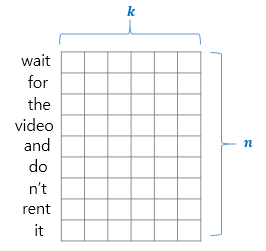  

- 이 행렬이 만약 LSTM의 입력으로 주어진다면, LSTM은 첫번째 시점에는 첫번째 행을 입력으로 받고, 두번째 시점에는 두번째 행을 입력으로 받으며 순차적으로 단어를 처리함
- 1D 합성곱 연산에서 커널의 너비는 문장 행렬에서의 임베딩 벡터의 차원과 동일하게 설정됨
    - 커널의 높이만으로 해당 커널의 크기라고 간주함
    - 커널의 크기가 2인 경우에는 아래의 그림과 같이 높이가 2, 너비가 임베딩 벡터의 차원인 커널이 사용됨  

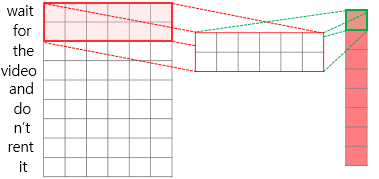  

- 커널의 너비가 임베딩 벡터의 차원이라는 의미는 커널이 2D 합성곱 연산때와는 달리 너비 방향으로는 더 이상 움직일 곳이 없다는 것임
- 그래서 1D 합성곱 연산에서는 커널이 문장 행렬의 높이 방향으로만 움직이게 되어있음
    - 위 그림에서 커널은 2D 합성곱 연산때와는 달리 오른쪽으로는 움직일 공간이 없으므로, 아래쪽으로만 이동해야 함
- 한 번의 연산을 1 스텝(step)이라고 하였을 때, 합성곱 연산의 네번째 스텝까지 표현한 이미지는 다음과 같음 
- 크기가 2인 커널은 처음에는 'wait for'에 대해서 합성곱 연산을 하고, 두번째 스텝에는 'for the'에 대해서 연산을, 세번째 스텝에는 'the video'에 대해서 연산을, 네번째 스텝에서는 'video and'에 대해서 연산을 하게됨  

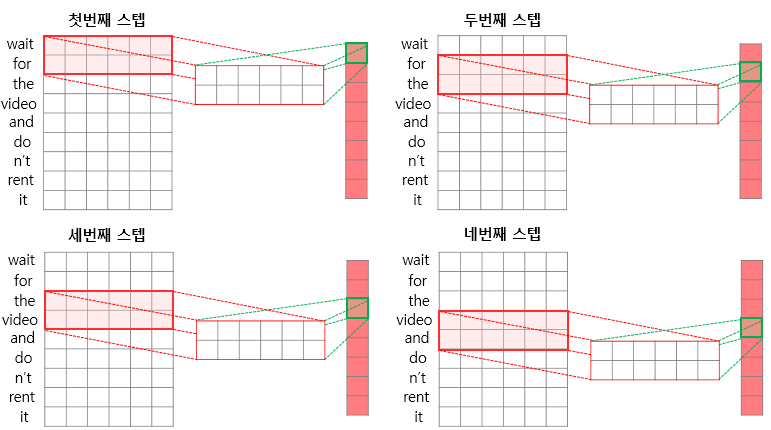  

- 여덟번째 스텝까지 반복하였을 때, 결과적으로는 우측의 8차원 벡터를 1D 합성곱 연산의 결과로 얻게됨
- 커널의 크기가 꼭 2일 필요는 없고, 1D 합성곱 연산에서도 커널의 크기는 사용자가 변경할 수 있음
- 커널의 크기를 3으로 한다면, 네번째 스텝에서의 연산은 아래의 그림과 같을 것임  

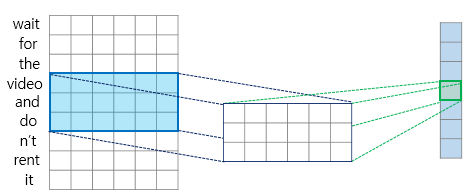  

- 1D 합성곱 연산과 자연어 처리 관점에서는 커널의 크기에 따라서 참고하는 단어의 묶음의 크기가 달라짐
    - 참고하는 n-gram이 달라진다고 볼 수 있음
    - 커널의 크기가 2라면 각 연산의 스텝에서 참고하는 것은 bigram
    - 커널의 크기가 3이라면 각 연산의 스텝에서 참고하는 것은 trigram

맥스 풀링(Max-pooling)

- 1D CNN에서도 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가 하게 됨
- 그 중 대표적으로 사용되는 것이 맥스 풀링(Max-pooling)
- 맥스 풀링은 각 합성곱 연산으로부터 얻은 결과 벡터에서 가장 큰 값을 가진 스칼라 값을 빼내는 연산

- 아래의 그림은 크기가 2인 커널과 크기가 3인 커널 두 개의 커널로부터 각각 결과 벡터를 얻고, 각 벡터에서 가장 큰 값을 꺼내오는 맥스 풀링 연산 내용  
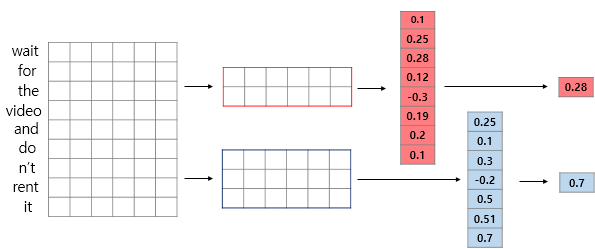

- 텍스트 이진 분류를 위한 CNN 설계
- 시그모이드 함수가 아니라 소프트맥스 함수를 사용할 것이므로 출력층에서 뉴런의 개수가 2인 신경망을 설계  

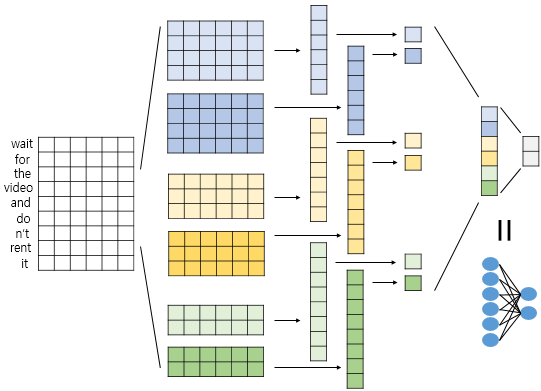  

- 커널은 크기가 4인 커널 2개, 3인 커널 2개, 2인 커널 2개를 사용
- 문장의 길이가 9인 경우, 합성곱 연산을 한 후에는 각각 6차원 벡터 2개, 7차원 벡터 2개, 8차원 벡터 2개를 얻음
- 벡터가 6개므로 맥스 풀링을 한 후에는 6개의 스칼라 값을 얻는데, 일반적으로 이렇게 얻은 스칼라값들은 전부 연결(concatenate)하여 하나의 벡터로 만듦
- 이렇게 얻은 벡터는 1D CNN을 통해서 문장으로부터 얻은 벡터
- 이를 뉴런이 2개인 출력층에 완전 연결시켜(Dense layer를 사용) 텍스트 분류를 수행함

In [2]:
# num_filters = 커널의 개수.
# kernel_size = 커널의 크기.
# padding = 패딩 방법.
# - valid : 패딩 없음. 제로 패딩없이 유효한(valid) 값만을 사용한다는 의미에서 valid.
# - same : 합성곱 연산 후에 출력이 입력과 동일한 차원을 가지도록 왼쪽과 오른쪽(또는 위, 아래)에 제로 패딩을 추가.
# activation = 활성화 함수. 

# from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Sequential

# model = Sequential()
# model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
# model.add(GlobalMaxPooling1D())

1D CNN으로 IMDB 리뷰 분류하기

In [10]:
# 전처리
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 최대 10000개의 단어를 허용하여 로드
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=vocab_size)
print(X_train[:2])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [5]:
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)

X_train shape :  (25000, 200)
X_test shape :  (25000, 200)


1D CNN으로 IMDB 리뷰 분류하기
- 하이퍼파라미터인 임베딩 벡터의 차원은 256, 드롭 아웃 비율은 0.3, 커널의 크기는 3이며 해당 커널은 총 256개 사용
- 합성곱 층과 맥스풀링 연산 후 전 결합층(Fully Connected Layer)을 은닉층을 추가로 사용했는데, 은닉층의 뉴런 수는 128
- 이진 분류 문제의 경우, 출력층에 로지스틱 회귀를 사용해야 하므로 활성화 함수로는 시그모이드 함수를 사용하고, 손실 함수로 크로스 엔트로피 함수를 사용. 20 에포크를 수행함.
- EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)는 검증 데이터 손실(val_loss)이 증가하면, 과적합 징후므로 검증 데이터 손실이 3회 증가하면 정해진 에포크가 도달하지 못하였더라도 학습을 조기 종료(Early Stopping)한다는 의미.
- ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장
    - validation_data로는 X_test와 y_test를 사용함. val_loss가 줄어들다가 증가하는 상황이 오면 과적합으로 판단하기 위함

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPool1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

embedding_dim = 256 # 임베딩 벡터의 차원
dropout_ratio = 0.3 # 드롭아웃 비율
num_filters = 256 # 커널의 수
kernel_size = 3 # 커널 크기
hidden_units = 128 # 뉴런 수

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint(
    'best_model.h5', monitor='val_acc', mode='max', verbose=1,
    save_best_only=True)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    X_train, y_train, epochs=20, validation_data=(X_test, y_test), 
    callbacks=[es, mc])

Epoch 1/20


2023-02-01 16:44:03.965314: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-02-01 16:44:04.596562: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


782/782 [==============================] - ETA: 0s - loss: 0.4037 - acc: 0.8068
Epoch 1: val_acc improved from -inf to 0.87752, saving model to best_model.h5
782/782 [==============================] - 12s 12ms/step - loss: 0.4037 - acc: 0.8068 - val_loss: 0.2879 - val_acc: 0.8775
Epoch 2/20
782/782 [==============================] - ETA: 0s - loss: 0.2049 - acc: 0.9220
Epoch 2: val_acc improved from 0.87752 to 0.88948, saving model to best_model.h5
782/782 [==============================] - 9s 12ms/step - loss: 0.2049 - acc: 0.9220 - val_loss: 0.2629 - val_acc: 0.8895
Epoch 3/20
779/782 [============================>.] - ETA: 0s - loss: 0.0979 - acc: 0.9660
Epoch 3: val_acc did not improve from 0.88948
782/782 [==============================] - 9s 12ms/step - loss: 0.0980 - acc: 0.9660 - val_loss: 0.2832 - val_acc: 0.8866
Epoch 4/20
778/782 [============================>.] - ETA: 0s - loss: 0.0414 - acc: 0.9867
Epoch 4: val_acc did not improve from 0.88948
782/782 [====================

In [9]:
loaded_model = load_model('best_model.h5')
print('\n accaracy: %.4f' % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 4s 5ms/step - loss: 0.2629 - acc: 0.8895

 accaracy: 0.8895


스팸 메일 분류하기(Spam Detection)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-02-01 17:21:11.343258: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-01 17:21:11.515283: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-01 17:21:11.552347: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-01 17:21:12.210656: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/ukairia777/"\
    "tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv",
    filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [3]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# 스팸 메일 데이터에는 총 5개의 열이 있는데, Unnamed라는 이름의 3개의 열은 텍스트 분류를 할 때 불필요함
# v1열은 해당 메일이 스팸인지 아닌지를 나타내는 레이블
# ham은 정상 메일을 의미하고, spam은 스팸 메일을 의미. v2열은 메일의 본문 내용
# 레이블과 메일 내용이 담긴 v1열과 v2열만 필요하므로, Unnamed: 2, Unnamed: 3, Unnamed: 4 열은 삭제
# v1열에 있는 ham과 spam 레이블을 각각 숫자 0과 1로 바꿈

del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham', 'spam'], [0, 1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
print('결측치 : ', data.isnull().values.any())

# False는 별도의 Null 값은 없음을 의미.
# 초기 데이터에 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'열에는 NaN이 있었는데 
# 해당 상태에서 수행하는 isnull().values.any()는 True를 리턴
# Null 값이 없다면 데이터에 중복이 있는지 확인
print('v2 열의 유니크 값 : ', data['v2'].nunique())

# 총 5,572개의 샘플이 존재하는데 v2열에서 중복을 제거한 샘플이 5,169개이므로
# 403개의 중복이 존재한다는 의미.
# v2 열에서 중복 샘플을 제거하고 전체 샘플 수를 확인
data.drop_duplicates(subset=['v2'], inplace=True)
print('총 샘플의 수:', len(data))

결측치 :  False
v2 열의 유니크 값 :  5169
총 샘플의 수: 5169


In [13]:
print('정상 메일과 스팸 메일의 개수')
print(data.groupby('v1').size().reset_index(name='count'))
print(f'정상 메일의 비율 = '\
      f'{round(data["v1"].value_counts()[0]/len(data) * 100, 3)}%')
print(f'스팸 메일의 비율 = '\
      f'{round(data["v1"].value_counts()[1]/len(data) * 100, 3)}%')

정상 메일과 스팸 메일의 개수
   v1  count
0   0   4516
1   1    653
정상 메일의 비율 = 87.367%
스팸 메일의 비율 = 12.633%


In [14]:
X_data = data['v2']
y_data = data['v1']
print(f'본문 개수:{len(X_data)}, 레이블 개수:{len(y_data)}')

본문 개수:5169, 레이블 개수:5169


In [17]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)
print(f'학습 정상 메일 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'학습 스팸 메일 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print(f'테스트 정상 메일 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'테스트 스팸 메일 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

학습 정상 메일 = 87.376%
학습 스팸 메일 = 12.624%
테스트 정상 메일 = 87.331%
테스트 스팸 메일 = 12.669%


In [32]:
# 케라스 토크나이저로 훈련 데이터에 대해서 토큰화와 정수 인코딩 과정을 수행
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:2])

word_to_index = tokenizer.word_index
# 위에서 부여된 각 정수는 각 단어의 빈도수가 높을 수록 낮은 정수가 부여됨
# 단어 i는 현재 전체 훈련 데이터에서 빈도수가 가장 높은 단어임
print(list(word_to_index.items())[:3])

[[102, 1, 210, 230, 3, 17, 39], [1, 59, 8, 427, 17, 5, 137, 2, 2326]]
[('i', 1), ('to', 2), ('you', 3)]


In [33]:
threshold = 2
total_cnt = len(word_to_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    
    # 단어의 등장 빈도수가 threshold 보다 작으면
    if (value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4337
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.45326684567191
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.65745644331875


In [42]:
vocab_size = len(word_to_index) + 1
print(f'단어 집합의 크기:{vocab_size}')
print(f'메일의 최대 길이 : {max(len(sample) for sample in X_train_encoded)}')
print(f'메일의 평균 길이 : {sum(map(len, X_train_encoded))/len(X_train_encoded):.4f}')

max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터 shape:", X_train_padded.shape)

단어 집합의 크기:7822
메일의 최대 길이 : 189
메일의 평균 길이 : 15.7545
훈련 데이터 shape: (4135, 189)


In [44]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding, Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 32
dropout_ratio = 0.3
num_filters = 32
kernel_size = 5

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc',
                     mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64,
                    validation_split=0.2, callbacks=[es, mc])

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]
2023-02-01 18:23:26.612600: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-02-01 18:23:27.201764: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


52/52 [==============================] - ETA: 0s - loss: 0.4454 - acc: 0.8724
Epoch 1: val_acc improved from -inf to 0.87787, saving model to best_model.h5
52/52 [==============================] - 4s 17ms/step - loss: 0.4454 - acc: 0.8724 - val_loss: 0.3726 - val_acc: 0.8779
Epoch 2/10
50/52 [===========================>..] - ETA: 0s - loss: 0.3722 - acc: 0.8728
Epoch 2: val_acc did not improve from 0.87787
52/52 [==============================] - 0s 9ms/step - loss: 0.3723 - acc: 0.8727 - val_loss: 0.3610 - val_acc: 0.8779
Epoch 3/10
50/52 [===========================>..] - ETA: 0s - loss: 0.3360 - acc: 0.8737
Epoch 3: val_acc improved from 0.87787 to 0.90085, saving model to best_model.h5
52/52 [==============================] - 1s 10ms/step - loss: 0.3354 - acc: 0.8736 - val_loss: 0.3090 - val_acc: 0.9008
Epoch 4/10
45/52 [========================>.....] - ETA: 0s - loss: 0.2355 - acc: 0.9066
Epoch 4: val_acc improved from 0.90085 to 0.96856, saving model to best_model.h5
52/52 [===

In [45]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen=max_len)
print(f'테스트 정확도:{model.evaluate(X_test_padded, y_test)[1]:.4f}')

33/33 [==============================] - 0s 5ms/step - loss: 0.0698 - acc: 0.9797
테스트 정확도:0.9797
